<a href="https://colab.research.google.com/github/anvishah1/House_price_prediction-P2/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dependecies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Preporcessing and setting up of dataframes

In [3]:
house_dataset=sklearn.datasets.fetch_california_housing()
print(house_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [4]:
data_frame=pd.DataFrame(house_dataset.data, columns = house_dataset.feature_names)
data_frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
data_frame['price']=house_dataset.target
data_frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
data_frame.shape

(20640, 9)

In [7]:
data_frame.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
price,0


In [8]:
data_frame.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [9]:
correlation=data_frame.corr() # to understand how every feature affects the other features
# positive correlation = x increases y increases
#negatvie correlation= x increased y decreases


<Axes: >

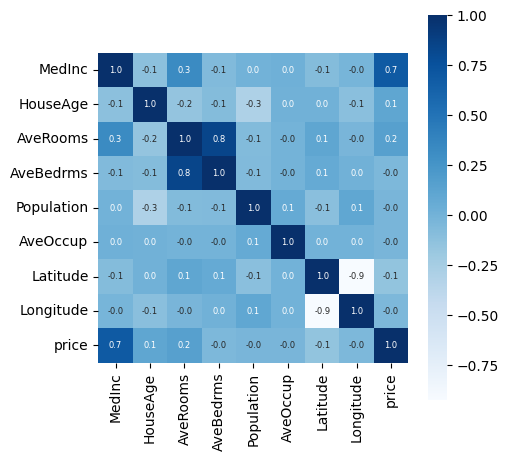

In [17]:
plt.figure(figsize=(5,5)) # the white bg bascially saying were making a picture
sns.heatmap(correlation,cbar=True, square=True, cmap="Blues",fmt=".1f",annot=True, annot_kws={"size": 6})
# creating a heatmap that plots all the correlations of each clm with respect to each other
# cbar = color bar to depict the range
# square= shape of cell
# cmap = color of chart
# fmt = show upto one decimal point
# annotate = correlation number
# kws = size of the annotations

In [18]:
X= data_frame.drop(['price'], axis=1)
Y=data_frame['price']

In [29]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.2,random_state=1)
print(X.shape,train_X.shape,test_X.shape)

(20640, 8) (16512, 8) (4128, 8)


MODEL TRAINING

In [21]:
model=XGBRegressor()
model.fit(train_X,train_Y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [40]:
training_predictions=model.predict(train_X.head(100))
sub_train=model.predict(train_X.head())
# print(training_predictions)

In [38]:
#comparing training data using mean_squared_error
mse_diff= metrics.mean_absolute_error(train_Y.head(),sub_train)
print("mse error is",mse_diff)
#comparing training data using r_squared_error ----- r squared value is best when close to 1 realistically and best model at = 0 anything >10 is bad
r_diff=metrics.r2_score(train_Y.head(),sub_train)
print("r squared error is",r_diff)

mse error is 0.13174018764495848
r squared error is 0.9809206901317414


VISUALISING THE DIFFERENCE BETWEEN THE TRAINING PREDICTED AND ACTUAL

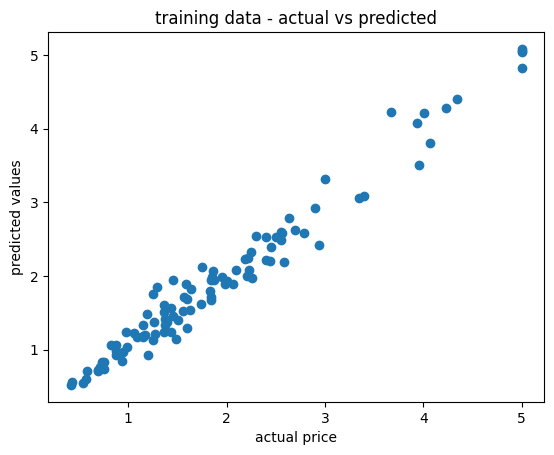

In [44]:
plt.scatter(train_Y.head(100),training_predictions)
plt.xlabel("actual price")
plt.ylabel("predicted values")
plt.title("training data - actual vs predicted")
plt.show()

In [47]:
#comparing with testing data for mse
test_predictions=model.predict(test_X.head(100))
mse_diff_test = metrics.mean_absolute_error(test_Y.head(100),test_predictions)
#comparing with testing data for r squared
r_diff_test=metrics.r2_score(test_Y.head(100),test_predictions)
print("mse diff is" ,mse_diff_test)
print("r diff is ",r_diff_test)

mse diff is 0.2997046777725219
r diff is  0.7951919854114764


VISUALISING THE TESTING DATA WITH ACTUAL VS PREDICTED

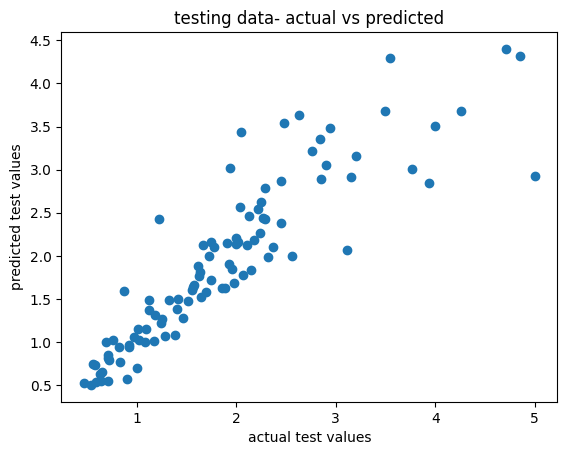

In [48]:
plt.scatter(test_Y.head(100),test_predictions)
plt.xlabel("actual test values")
plt.ylabel("predicted test values")
plt.title("testing data- actual vs predicted")
plt.show()